In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]

In [6]:
data_folder = r"F:\data\gst-0815-23\Mechanism_6_use_local_optima\MutualDeviation_across_Alpha"
alpha_list = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45]
gg_deviation_across_K_alpha, gs_deviation_across_K_alpha, ss_deviation_across_K_alpha, sg_deviation_across_K_alpha = [], [], [], []
for alpha in alpha_list:
    gg_deviation_file = data_folder + r"\gg_mutual_deviation_across_K_alpha_{0}".format(alpha)
    gs_deviation_file = data_folder + r"\gs_mutual_deviation_across_K_alpha_{0}".format(alpha)
    ss_deviation_file = data_folder + r"\ss_mutual_deviation_across_K_alpha_{0}".format(alpha)
    sg_deviation_file = data_folder + r"\sg_mutual_deviation_across_K_alpha_{0}".format(alpha)

    with open(gg_deviation_file, 'rb') as infile:
        gg_deviation = pickle.load(infile)
    with open(gs_deviation_file, 'rb') as infile:
        gs_deviation = pickle.load(infile)
    with open(ss_deviation_file, 'rb') as infile:
        ss_deviation = pickle.load(infile)
    with open(sg_deviation_file, 'rb') as infile:
        sg_deviation = pickle.load(infile)
    
    gg_deviation_across_K_alpha.append(gg_deviation)
    gs_deviation_across_K_alpha.append(gs_deviation)
    ss_deviation_across_K_alpha.append(ss_deviation)
    sg_deviation_across_K_alpha.append(sg_deviation)
    
# print(np.array(gg_climb).shape)
# print(gg_climb)

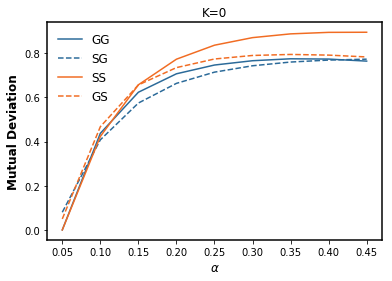

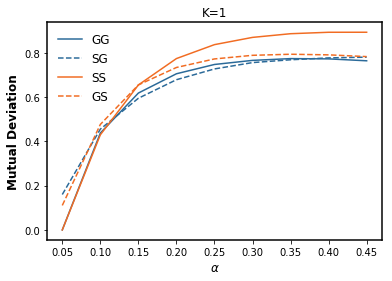

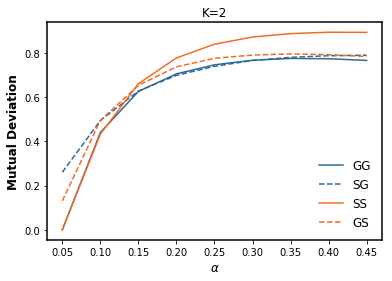

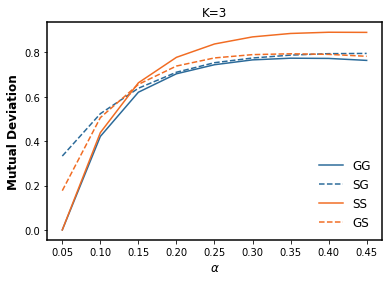

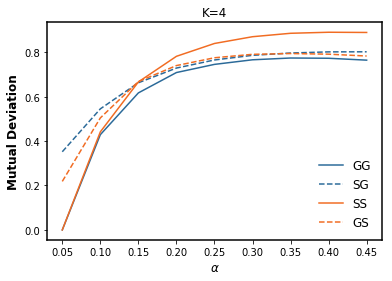

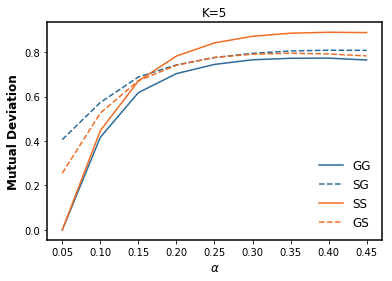

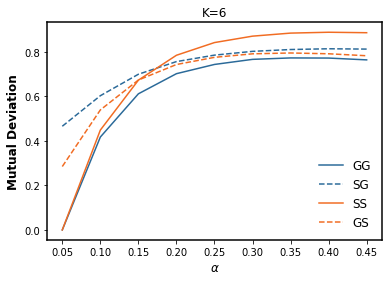

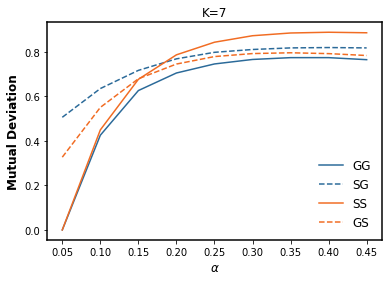

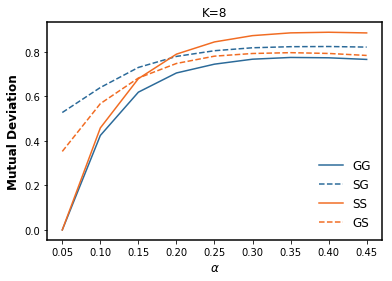

In [7]:
# GST Fitness
x = alpha_list
for K in range(9):
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, gg_deviation_across_K_alpha[K], "-", label="GG", color=nature_blue)
    plt.plot(x, gs_deviation_across_K_alpha[K], "--", label="SG", color=nature_blue)
    plt.plot(x, ss_deviation_across_K_alpha[K], "-", label="SS", color=nature_orange)
    plt.plot(x, sg_deviation_across_K_alpha[K], "--", label="GS", color=nature_orange)

    plt.xlabel('$\\alpha$', fontweight='bold', fontsize=12)
    plt.ylabel('Mutual Deviation', fontweight='bold', fontsize=12)
    plt.xticks(x)
    plt.title("K={0}".format(K))
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\Mutual_Deviation_across_Alpha_K_{0}.png".format(K), transparent=True, dpi=300)
    plt.show()

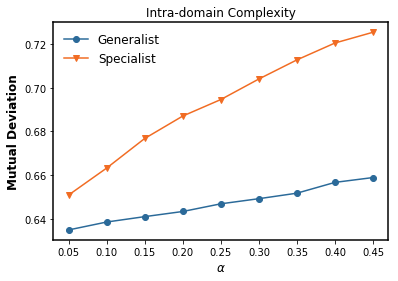

In [8]:
# Integrate G and S
K_list = range(0, 9)
gg_deviation_across_alpha, gs_deviation_across_alpha, ss_deviation_across_alpha, sg_deviation_across_alpha = [], [], [], []
for gg_deviation, gs_deviation, ss_deviation, sg_deviation in zip(gg_deviation_across_K_alpha, gs_deviation_across_K_alpha, ss_deviation_across_K_alpha, sg_deviation_across_K_alpha):
    gg_deviation_across_alpha.append(sum(gg_deviation) / len(gg_deviation))  # take an average across K
    gs_deviation_across_alpha.append(sum(gs_deviation) / len(gs_deviation))
    ss_deviation_across_alpha.append(sum(ss_deviation) / len(ss_deviation))
    sg_deviation_across_alpha.append(sum(sg_deviation) / len(sg_deviation))

G_deviation_across_alpha = []
for gg, sg in zip(gg_deviation_across_alpha, sg_deviation_across_alpha):
    new_g = 0.5 * (gg + sg)
    G_deviation_across_alpha.append(new_g)
S_deviation_across_alpha = []
for ss, gs in zip(ss_deviation_across_alpha, gs_deviation_across_alpha):
    new_s = 0.5 * (ss + gs)
    S_deviation_across_alpha.append(new_s)
x = alpha_list
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, G_deviation_across_alpha, marker='o', linestyle='-', label="Generalist", color=nature_blue)
plt.plot(x, S_deviation_across_alpha, "-", marker='v', linestyle='-', label="Specialist", color=nature_orange)
plt.xlabel('$\\alpha$', fontweight='bold', fontsize=12)
plt.ylabel('Mutual Deviation', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.title("Intra-domain Complexity")
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Mutual_Deviation_across_Alpha.png", transparent=True, dpi=300)
plt.show()